In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="1"; 

import urllib.request
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
import ktrain
from ktrain import tabular

# Predicting House Prices

In this notebook, we will predict which individuals make more than $50K from Census data.  This is the same dataset used in the [AutoGluon tabular prediction example](https://autogluon.mxnet.io/tutorials/tabular_prediction/tabular-quickstart.html).

## STEP 1:  Load and Preprocess Data

In [3]:
train_df = pd.read_csv('data/housing_price/train.csv', index_col=0)

In [4]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'], 1, inplace=True)

In [6]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
trn, val, preproc = tabular.tabular_from_df(train_df, is_regression=True, 
                                             label_columns='SalePrice', random_state=42)

processing train: 1309 rows x 74 columns

The following integer column(s) are being treated as categorical variables:
['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
To treat any of these column(s) as numerical, cast the column to float in DataFrame or CSV
 and re-run tabular_from* function.

processing test: 151 rows x 74 columns


/home/amaiya/projects/ghub/ktrain/ktrain/utils.py:556: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'If this is incorrect, change accordingly.')


## STEP 2: Create Model and Wrap in `Learner`

In [8]:
model = tabular.tabular_regression_model('mlp', trn)
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=128)

done.


## STEP 3: Estimate LR


simulating training for different learning rates... this may take a few moments...
Train for 10 steps
Epoch 1/16
10/10 [==============================] - 6s 585ms/step - loss: 38558915976.7790 - mae: 180382.3125
Epoch 2/16
10/10 [==============================] - 1s 99ms/step - loss: 39023417753.2532 - mae: 181231.7500
Epoch 3/16
10/10 [==============================] - 1s 97ms/step - loss: 38186323513.6596 - mae: 179885.8750
Epoch 4/16
10/10 [==============================] - 1s 100ms/step - loss: 38604418087.0178 - mae: 180230.8906
Epoch 5/16
10/10 [==============================] - 1s 98ms/step - loss: 39033354170.6351 - mae: 181204.7500
Epoch 6/16
10/10 [==============================] - 1s 97ms/step - loss: 39011824844.8000 - mae: 180592.0938
Epoch 7/16
10/10 [==============================] - 1s 99ms/step - loss: 38185889790.2659 - mae: 179885.8281
Epoch 8/16
10/10 [==============================] - 1s 99ms/step - loss: 38557565229.7375 - mae: 180382.1094
Epoch 9/16
10/10 [======

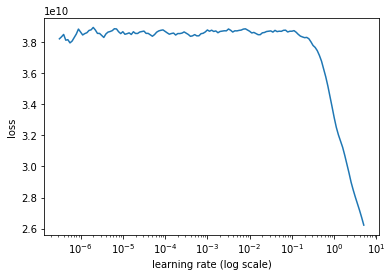

In [9]:
learner.lr_find(show_plot=True, max_epochs=16)

## STEP 4: Train

In [10]:
learner.fit_onecycle(1.0, 80)



begin training using onecycle policy with max lr of 1.0...
Train for 11 steps, validate for 5 steps
Epoch 1/80
11/11 [==============================] - 7s 614ms/step - loss: 38622675896.0306 - mae: 180325.2500 - val_loss: 42259057868.8000 - val_mae: 196406.6250
Epoch 2/80
11/11 [==============================] - 1s 132ms/step - loss: 37998489032.8495 - mae: 179130.9219 - val_loss: 45361928601.6000 - val_mae: 205543.0000
Epoch 3/80
11/11 [==============================] - 1s 134ms/step - loss: 36169282988.6875 - mae: 175332.7031 - val_loss: 57640367718.4000 - val_mae: 236101.0312
Epoch 4/80
11/11 [==============================] - 1s 135ms/step - loss: 32356137421.9343 - mae: 167567.6406 - val_loss: 101063426048.0000 - val_mae: 314440.8438
Epoch 5/80
11/11 [==============================] - 1s 134ms/step - loss: 25916098948.4003 - mae: 151413.0781 - val_loss: 163092221132.8000 - val_mae: 372271.3125
Epoch 6/80
11/11 [==============================] - 1s 133ms/step - loss: 17150961227.

Epoch 52/80
11/11 [==============================] - 1s 134ms/step - loss: 542951021.6593 - mae: 16629.1191 - val_loss: 2457809868.8000 - val_mae: 38136.6875
Epoch 53/80
11/11 [==============================] - 2s 136ms/step - loss: 516593589.3843 - mae: 16496.3164 - val_loss: 3175836236.8000 - val_mae: 47501.4141
Epoch 54/80
11/11 [==============================] - 2s 137ms/step - loss: 487540297.1551 - mae: 15905.9590 - val_loss: 2790615859.2000 - val_mae: 42967.6289
Epoch 55/80
11/11 [==============================] - 1s 136ms/step - loss: 469855204.5653 - mae: 15643.8916 - val_loss: 2601527347.2000 - val_mae: 43434.0938
Epoch 56/80
11/11 [==============================] - 1s 136ms/step - loss: 531294588.6509 - mae: 16500.0879 - val_loss: 2127521459.2000 - val_mae: 36745.2031
Epoch 57/80
11/11 [==============================] - 2s 137ms/step - loss: 468589196.0519 - mae: 16046.4062 - val_loss: 1850975795.2000 - val_mae: 34023.5195
Epoch 58/80
11/11 [==============================] -

## Evaluate Model

In [22]:
learner.evaluate(test_data=val)

[('mae', 17215.245188327815)]